Neural Network Classification (Bonus)

Import Libraries

In [25]:
# Import libraries with logical grouping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn for preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Keras for neural network
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

Constants

In [26]:
RANDOM_STATE = 42
TEST_SIZE = 0.1
VALIDATION_SPLIT = 0.1

Load and Preprocess Data


In [27]:
data = pd.read_csv("dataset.csv")
# Encode categorical features
#---------------------------------
#le_location = LabelEncoder()
#le_gender = LabelEncoder()
#le_relationship = LabelEncoder()

#data['Location'] = le_location.fit_transform(data['Location'])
#data['Gender'] = le_gender.fit_transform(data['Gender'])
#data['Relationship_Status'] = le_relationship.fit_transform(data['Relationship_Status'])

# One-hot encode categorical features (safer for nominal variables)
data = pd.get_dummies(data, columns=['Location', 'Gender', 'Relationship_Status'])
#------------------------------------


# Define features and target
X = data.drop(columns=['User_ID', 'Sleep_Quality'])  # exclude user ID and target
y = data['Sleep_Quality']


# Categorize sleep quality (Low:1-3, Medium:4-7, High:8-10)
y = y.apply(lambda val: 0 if val <= 3 else (1 if val <= 7 else 2))

# Normalize features
scaler = StandardScaler() # StandardScaler normalizes all features to have mean=0 and variance=1
                          # This helps neural networks train more effectively
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (528, 20)
X_test shape: (528, 20)
y_train shape: (528,)
y_test shape: (528,)


Build Neural Network Model

In [28]:
#Add Regularization (Dropout + BatchNorm)
#Prevents overfitting and stabilizes training:
model = Sequential([
    Input(shape=(X_train.shape[1],)), #Number of features
    Dense(16, activation='relu'),
    BatchNormalization(),  # Stabilizes training
    Dropout(0.3),         # Randomly disable 30% of neurons
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', #Adaptive Moment Estimation
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 595 (2.32 KB)

 Trainable params: 547 (2.14 KB)

 Non-trainable params: 48 (192.00 B)

None


Train the model with callbacks and return training history

In [29]:

callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
    ]

history = model.fit(
        X_train,
        y_train,
        epochs=100,  # Increased with early stopping
        batch_size=16,  # Smaller batch size for better generalization
        validation_split=VALIDATION_SPLIT,
        callbacks=callbacks,
        verbose=1
    )




Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1922 - loss: 1.8011 - val_accuracy: 0.2075 - val_loss: 1.2402 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2986 - loss: 1.3799 - val_accuracy: 0.3019 - val_loss: 1.0334 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3951 - loss: 1.1581 - val_accuracy: 0.5283 - val_loss: 0.8832 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5092 - loss: 0.9635 - val_accuracy: 0.5660 - val_loss: 0.7651 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5832 - loss: 0.8844 - val_accuracy: 0.7170 - val_loss: 0.6751 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6659 - loss: 0.7891 - val_accuracy: 0.6981 - val_loss: 0.6173 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6626 - loss: 0.7721 - val_ac

Evalute Model

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

         Low       0.99      0.98      0.98       159
      Medium       0.99      0.99      0.99       204
        High       0.99      1.00      1.00       165

    accuracy                           0.99       528
   macro avg       0.99      0.99      0.99       528
weighted avg       0.99      0.99      0.99       528



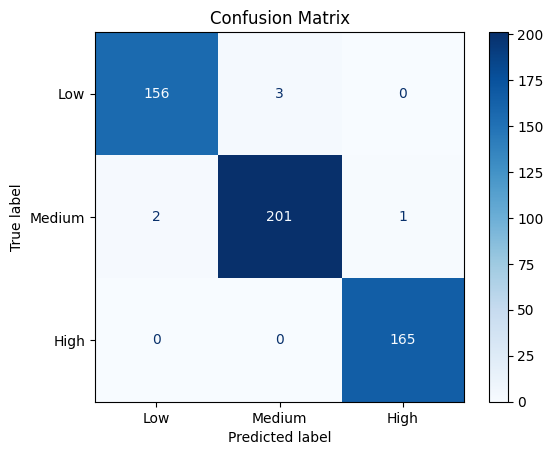


Test Accuracy: 0.9886
Test Loss: 0.0570


In [34]:
 # Predict on test set
y_pred = model.predict(X_test).argmax(axis=1) # run the trained model on test dat


# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Test accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

Plot Accuracy and loss

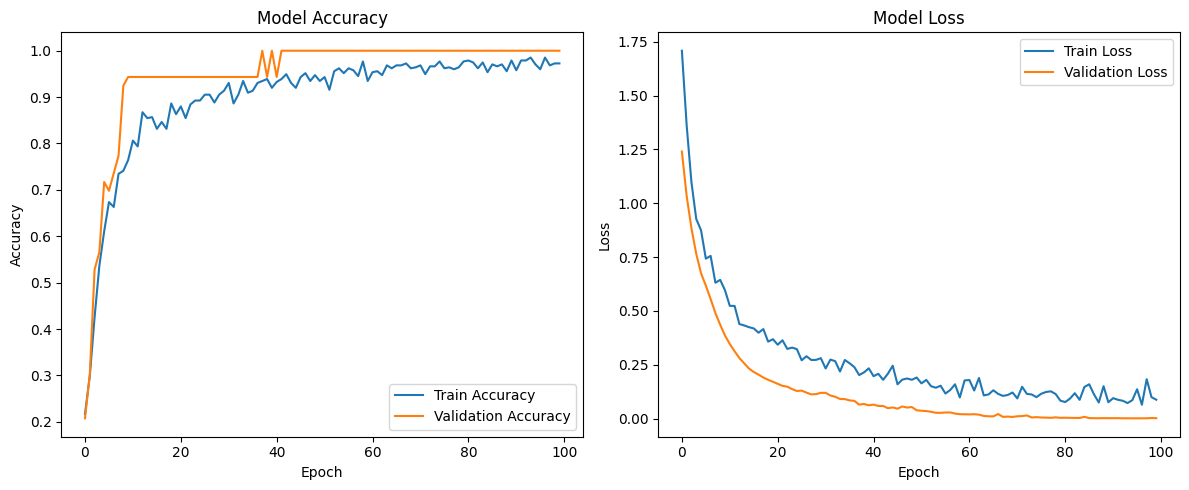

In [35]:
# Plot Accuracy & Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Predctions Graphs

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


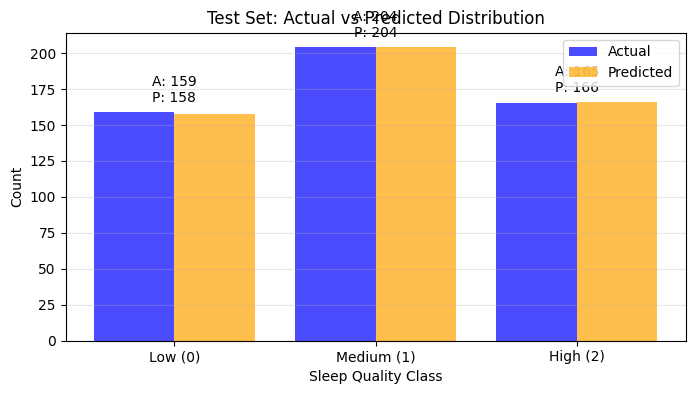

In [36]:
# Get predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Create figure
plt.figure(figsize=(8, 4))
# Plot histograms
bins = np.arange(4) - 0.5
plt.hist([y_test, y_pred], bins=bins, label=['Actual', 'Predicted'],
             alpha=0.7, color=['blue', 'orange'])

# Formatting
plt.xticks([0, 1, 2], ['Low (0)', 'Medium (1)', 'High (2)'])
plt.xlabel('Sleep Quality Class')
plt.ylabel('Count')
plt.title('Test Set: Actual vs Predicted Distribution')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add text annotations
for i in range(3):
  actual_count = sum(y_test == i)
  pred_count = sum(y_pred == i)
  plt.text(i, max(actual_count, pred_count) + 5,
            f"A: {actual_count}\nP: {pred_count}",
              ha='center', va='bottom')

plt.show()

Save Model

In [37]:
model.save('sleep_quality_classifier.h5')